In [1]:
%reset -f

In [2]:
user = "HHegde"
db = f"/Users/{user}/.data/oaklib/phenio.db"

In [3]:
%reload_ext sql
%sql sqlite:///{db}

In [4]:
%sql SELECT * FROM term_association LIMIT 2;

 * sqlite:////Users/HHegde/.data/oaklib/phenio.db
Done.


id,subject,predicate,object,evidence_type,publication,source
uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations


In [5]:
import sqlite3
import pandas as pd
from semsimian import Semsimian
from collections import Counter

In [6]:
conn = sqlite3.connect(db)
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
# tables = res.fetchall()

# tables

In [7]:
df_term_association = pd.read_sql_query("SELECT * FROM term_association", conn)
df_term_association.head()

,id,subject,predicate,object,evidence_type,publication,source
0,uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
1,uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations
2,uuid:70269c5c-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0001518,ECO:0000269,PMID:31675180,infores:hpo-annotations
3,uuid:70269c5d-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0032792,ECO:0000269,PMID:31675180,infores:hpo-annotations
4,uuid:70269c5e-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011451,ECO:0000269,PMID:31675180,infores:hpo-annotations


df_term_association['subject'].str.split(":").str[0].unique()

In [8]:
df_term_association['object'].str.split(":").str[0].unique()

array(['HP', 'WBPhenotype', 'MP', 'XPO', 'ZP'], dtype=object)

In [9]:
# MONDO:0007523 => Ehlers-Danlos syndrome
condition_1 = df_term_association['subject'] == "MONDO:0007523"
condition_2 = df_term_association['object'].str.startswith("HP:")
df_100 = df_term_association[condition_1 & condition_2]
# df_100 = df_100[['subject', 'predicate', 'object']]
df_100

,id,subject,predicate,object,evidence_type,publication,source
120177,uuid:77611b21-42a9-11ee-be37-31ef105c25ea,MONDO:0007523,biolink:has_phenotype,HP:0100699,ECO:0000304,OMIM:130020,infores:hpo-annotations
120178,uuid:77611b22-42a9-11ee-be37-31ef105c25ea,MONDO:0007523,biolink:has_phenotype,HP:0001388,ECO:0000501,OMIM:130020,infores:hpo-annotations
120179,uuid:77611b23-42a9-11ee-be37-31ef105c25ea,MONDO:0007523,biolink:has_phenotype,HP:0001382,ECO:0000304,OMIM:130020,infores:hpo-annotations
120180,uuid:77611b24-42a9-11ee-be37-31ef105c25ea,MONDO:0007523,biolink:has_phenotype,HP:0001065,ECO:0000501,OMIM:130020,infores:hpo-annotations
120181,uuid:77611b25-42a9-11ee-be37-31ef105c25ea,MONDO:0007523,biolink:has_phenotype,HP:0001373,ECO:0000501,OMIM:130020,infores:hpo-annotations
...,...,...,...,...,...,...,...
149343,uuid:7914766d-42a9-11ee-be37-31ef105c25ea,MONDO:0007523,biolink:has_phenotype,HP:0012378,ECO:0000304,orphanet:285,infores:hpo-annotations
149344,uuid:7914766e-42a9-11ee-be37-31ef105c25ea,MONDO:0007523,biolink:has_phenotype,HP:0012732,ECO:0000304,orphanet:285,infores:hpo-annotations
149345,uuid:7914766f-42a9-11ee-be37-31ef105c25ea,MONDO:0007523,biolink:has_phenotype,HP:0100550,ECO:0000304,orphanet:285,infores:hpo-annotations
149346,uuid:79147670-42a9-11ee-be37-31ef105c25ea,MONDO:0007523,biolink:has_phenotype,HP:0100645,ECO:0000304,orphanet:285,infores:hpo-annotations


In [10]:
df_100['object'].drop_duplicates()

120177    HP:0100699
120178    HP:0001388
120179    HP:0001382
120180    HP:0001065
120181    HP:0001373
             ...    
149343    HP:0012378
149344    HP:0012732
149345    HP:0100550
149346    HP:0100645
149347    HP:0100823
Name: object, Length: 61, dtype: object

In [11]:
%%time
predicates = ["rdfs:subClassOf", "BFO:0000050"]
semsimian = Semsimian(
            spo=None,
            predicates=predicates,
            pairwise_similarity_attributes=None,
            resource_path=db,
        )


CPU times: user 12.9 s, sys: 949 ms, total: 13.9 s
Wall time: 14.4 s


In [12]:

subject_prefixes = ["MGI:"]
object_terms = set(df_100['object'].drop_duplicates())
assoc_predicate = {"biolink:has_phenotype"}
include_similarity_object = True
limit = None


In [13]:
%%time

search_type = "full"

full_result = semsimian.associations_search(
            assoc_predicate,
            object_terms,
            include_similarity_object,
            search_type,
            None,
            subject_prefixes,
            limit,
        )

CPU times: user 1h 28s, sys: 1min 4s, total: 1h 1min 32s
Wall time: 1h 1min 58s


In [14]:
sorted(Counter(x[0] for x in full_result).items(), key=lambda x: x[0], reverse=True)

[(8.563525372720415, 1),
 (8.144223269951185, 3),
 (7.95496998069434, 1),
 (7.913113266552635, 1),
 (7.84145766835263, 1),
 (7.748379478204287, 1),
 (7.691179162535683, 1),
 (7.634578458943819, 1),
 (7.612636715999246, 1),
 (7.595192628593718, 1),
 (7.574915856218648, 4),
 (7.569326836215219, 1),
 (7.558136769556317, 1),
 (7.545392836516729, 1),
 (7.54475105844964, 1),
 (7.529414219688874, 1),
 (7.5156740509155, 1),
 (7.511109176996957, 1),
 (7.506616351500887, 1),
 (7.505891527454106, 1),
 (7.496142511934366, 1),
 (7.48282352697512, 1),
 (7.481666086627726, 1),
 (7.481093013986893, 1),
 (7.476498135067311, 1),
 (7.460940625849714, 1),
 (7.445926067070926, 1),
 (7.430128635402403, 1),
 (7.428891567150469, 1),
 (7.420333706620538, 1),
 (7.398117826208345, 1),
 (7.390927778603984, 1),
 (7.387882063166119, 1),
 (7.387519511402909, 1),
 (7.3861891159058715, 1),
 (7.381737470201992, 1),
 (7.380328802834162, 1),
 (7.37724982216228, 1),
 (7.3740573506370035, 1),
 (7.371260854536271, 1),
 (7.3

In [15]:
full_result[0][2]

'MGI:5311876'

In [16]:
full_result[0][1]['object_best_matches']

{'HP:0000023': {'match_source': 'HP:0000023',
  'match_source_label': 'Inguinal hernia (HPO)',
  'match_target': 'MP:0011279',
  'match_target_label': 'decreased ear pigmentation (MPO)',
  'score': '2.697873983902985'},
 'HP:0000140': {'match_source': 'HP:0000140',
  'match_source_label': 'Abnormality of the menstrual cycle (HPO)',
  'match_target': 'MP:0011279',
  'match_target_label': 'decreased ear pigmentation (MPO)',
  'score': '3.313975254540558'},
 'HP:0000144': {'match_source': 'HP:0000144',
  'match_source_label': 'Decreased fertility (HPO)',
  'match_target': 'MP:0011279',
  'match_target_label': 'decreased ear pigmentation (MPO)',
  'score': '2.07486389840811'},
 'HP:0000164': {'match_source': 'HP:0000164',
  'match_source_label': 'Abnormality of the dentition (HPO)',
  'match_target': 'MP:0011279',
  'match_target_label': 'decreased ear pigmentation (MPO)',
  'score': '3.7522262216820286'},
 'HP:0000168': {'match_source': 'HP:0000168',
  'match_source_label': 'Abnormality o

In [17]:
%%time
search_type = "flat"

flat_result = semsimian.associations_search(
            assoc_predicate,
            object_terms,
            include_similarity_object,
            search_type,
            None,
            subject_prefixes,
            limit,
        )

CPU times: user 12.6 s, sys: 308 ms, total: 12.9 s
Wall time: 12 s


In [18]:
sorted(Counter(x[0] for x in flat_result).items(), key=lambda x: x[0], reverse=True)

[(0.11347517730496454, 1),
 (0.11181434599156118, 1),
 (0.10754189944134078, 1),
 (0.1046831955922865, 1),
 (0.1038107752956636, 1),
 (0.10334788937409024, 1),
 (0.10300429184549356, 1),
 (0.10277324632952692, 1),
 (0.10248901903367497, 1),
 (0.10243055555555555, 1),
 (0.10241820768136557, 1),
 (0.10220125786163523, 1),
 (0.10214168039538715, 1),
 (0.10209424083769633, 1),
 (0.10197368421052631, 1),
 (0.10196560196560196, 1),
 (0.10191846522781775, 1),
 (0.1017156862745098, 1),
 (0.1016949152542373, 1),
 (0.10139860139860139, 1),
 (0.10085227272727272, 1),
 (0.10076335877862595, 1),
 (0.09818181818181818, 1),
 (0.09813664596273292, 1),
 (0.09807073954983923, 1),
 (0.09792284866468842, 1),
 (0.09759547383309759, 1),
 (0.09746835443037975, 1),
 (0.09745762711864407, 1),
 (0.09739524348810873, 1),
 (0.09733124018838304, 1),
 (0.09673659673659674, 1),
 (0.09664948453608248, 1),
 (0.09656084656084656, 1),
 (0.09630606860158311, 1),
 (0.0962406015037594, 1),
 (0.09617612977983778, 1),
 (0.09

In [19]:
%%time
search_type = "hybrid"

hybrid_result = semsimian.associations_search(
            assoc_predicate,
            object_terms,
            include_similarity_object,
            search_type,
            None,
            subject_prefixes,
            limit,
        )

Using cache! "MGI:biolink:has_phenotypeflat"
CPU times: user 59min 7s, sys: 54.8 s, total: 1h 2s
Wall time: 1h 2s
Using cache! "MGI:biolink:has_phenotypefull"


In [20]:
sorted(Counter(x[0] for x in hybrid_result).items(), key=lambda x: x[0], reverse=True)

[(8.563525372720415, 1),
 (8.144223269951183, 3),
 (7.954969980694339, 1),
 (7.913113266552637, 1),
 (7.841457668352629, 1),
 (7.748379478204287, 1),
 (7.691179162535683, 1),
 (7.634578458943819, 1),
 (7.612636715999244, 1),
 (7.595192628593718, 1),
 (7.574915856218647, 4),
 (7.569326836215218, 1),
 (7.558136769556317, 1),
 (7.545392836516728, 1),
 (7.5447510584496404, 1),
 (7.529414219688874, 1),
 (7.5156740509155, 1),
 (7.511109176996958, 1),
 (7.506616351500886, 1),
 (7.505891527454105, 1),
 (7.496142511934366, 1),
 (7.482823526975121, 1),
 (7.481666086627725, 1),
 (7.481093013986891, 1),
 (7.47649813506731, 1),
 (7.460940625849712, 1),
 (7.445926067070926, 1),
 (7.430128635402404, 1),
 (7.428891567150469, 1),
 (7.4203337066205375, 1),
 (7.398117826208345, 1),
 (7.390927778603984, 1),
 (7.387882063166119, 1),
 (7.387519511402909, 1),
 (7.386189115905871, 1),
 (7.381737470201992, 1),
 (7.380328802834163, 1),
 (7.37724982216228, 1),
 (7.374057350637002, 1),
 (7.371260854536271, 1),
 (

In [21]:
len(hybrid_result)

15636

In [22]:
full_result_score_curie = [(a,c) for (a, _, c) in full_result]
flat_result_score_curie = [(a,c) for (a, _, c) in flat_result]
hybrid_result_score_curie = [(a,c) for (a, _, c) in hybrid_result]

In [23]:
len(full_result_score_curie)

15636

In [24]:
len(flat_result_score_curie)

15636

In [25]:
def get_ordered_list(result_1, result_2):
    # Create a dictionary that maps MGI values to tuples in result_2
    result_2_dict = {mgi: tup for tup, mgi in result_2}

    # Create a new list of tuples from result_2 that match the MGI values in result_1
    result_2_pruned = [(result_2_dict[mgi], mgi) for _, mgi in result_1 if mgi in result_2_dict]
    return result_2_pruned

### Plot params

In [26]:
n = 50
full_result_score_curie_subset = full_result_score_curie[:n]
full_ordered_flat_subset = get_ordered_list(full_result_score_curie_subset, flat_result_score_curie)
full_ordered_hybrid_subset = get_ordered_list(full_result_score_curie_subset, hybrid_result_score_curie)

# print(full_result_score_curie_subset)
# print(full_ordered_flat_subset)
# print(full_ordered_hybrid_subset)

In [27]:
flat_result_score_curie_subset = flat_result_score_curie[:n]
flat_ordered_full_subset = get_ordered_list(flat_result_score_curie_subset, full_result_score_curie)
flat_ordered_hybrid_subset = get_ordered_list(flat_result_score_curie_subset, hybrid_result_score_curie)

# print(flat_result_score_curie_subset)
# print(flat_ordered_full_subset)
# print(flat_ordered_hybrid_subset)


In [28]:
hybrid_result_score_curie_subset = hybrid_result_score_curie[:n]
hybrid_ordered_full_subset = get_ordered_list(hybrid_result_score_curie_subset, full_result_score_curie)
hybrid_ordered_flat_subset = get_ordered_list(hybrid_result_score_curie_subset, flat_result_score_curie)

# print(hybrid_result_score_curie_subset)
# print(hybrid_ordered_full_subset)
# print(hybrid_ordered_flat_subset)


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text


def plot_graph(full_result, flat_result, hybrid_result, title):
    full_values, full_labels = zip(*full_result)
    flat_values, flat_labels = zip(*flat_result)
    hybrid_values, hybrid_labels = zip(*hybrid_result)

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Add a title
    if title:
        ax.set_title(title)

    # # Convert labels to numerical values
    # unique_labels = list(set(full_labels + flat_labels + hybrid_labels))
    # label_to_num = {label: num for num, label in enumerate(unique_labels)}

    # full_labels = [label_to_num[label] for label in full_labels]
    # flat_labels = [label_to_num[label] for label in flat_labels]
    # hybrid_labels = [label_to_num[label] for label in hybrid_labels]

    # Plot 'full' with 'o' markers
    ax.scatter(full_labels, full_values, marker='o', color='r', label='full search')
    texts1 = [plt.text(full_labels[i], full_values[i], str(txt), rotation=90) for i, txt in enumerate(full_values)]
    
    # Plot 'flat' with 'x' markers
    ax.scatter(flat_labels, flat_values, marker='x', color='b', label='flat search')
    texts2 = [plt.text(flat_labels[i], flat_values[i], str(txt), rotation=90) for i, txt in enumerate(flat_values)]
    
    # Plot 'hybrid' with 'x' markers
    ax.scatter(hybrid_labels, hybrid_values, marker='*', color='g', label='hybrid search')
    texts3 = [plt.text(hybrid_labels[i], hybrid_values[i], str(txt), rotation=90) for i, txt in enumerate(hybrid_values)]
    
    
    # Add a legend
    ax.legend()
    
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    
    # all_texts = texts1+texts2+texts3
    
    # # Adjust text to avoid overlaps
    # adjust_text(all_texts, autoalign='y', only_move={'points':'y', 'text':'y'})
    
    # Show the plot
    plt.show()

Ordered by Full search ranks


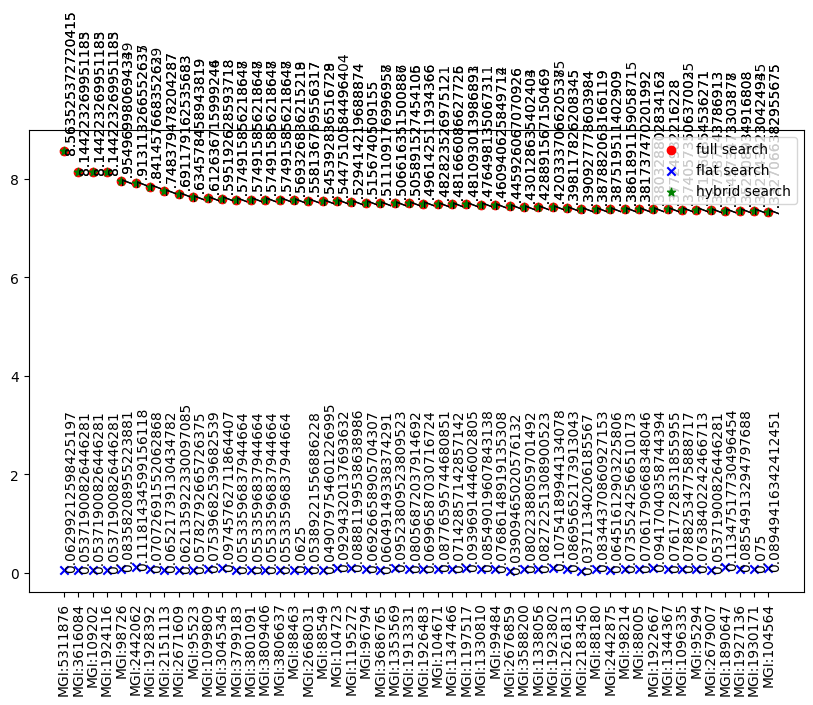

In [30]:
print("Ordered by Full search ranks")
plot_graph(full_result_score_curie_subset, full_ordered_flat_subset, full_ordered_hybrid_subset, None)

Ordered by Flat search ranks


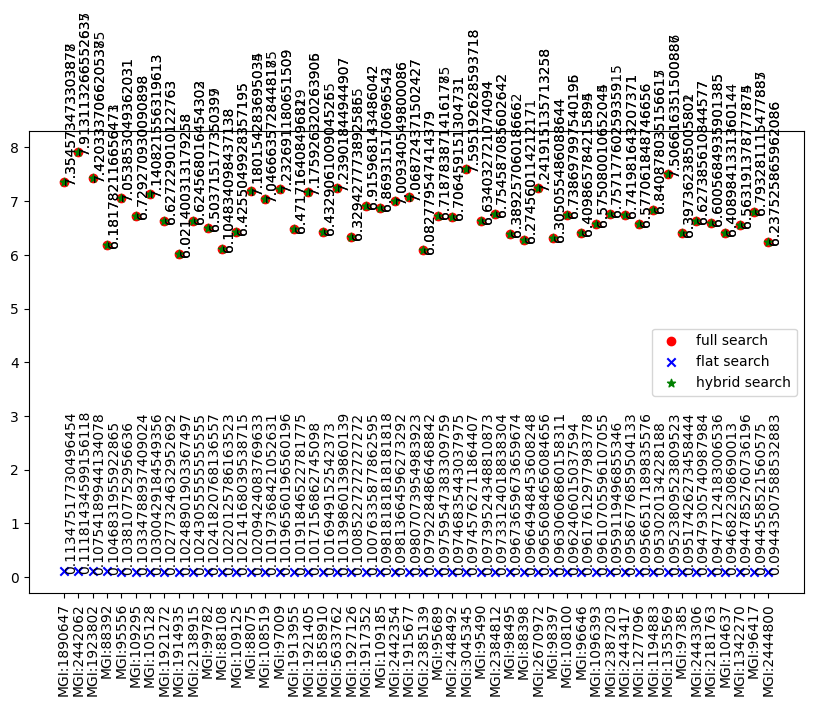

In [31]:
print( "Ordered by Flat search ranks")

plot_graph(flat_ordered_full_subset, flat_result_score_curie_subset, flat_ordered_hybrid_subset, None)

Ordered by Hybrid search ranks


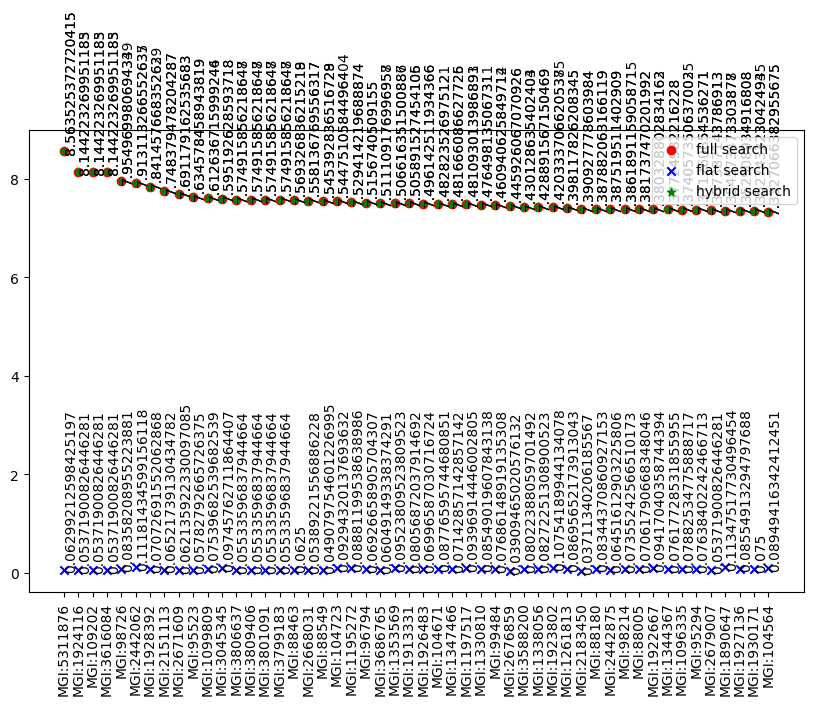

In [32]:

print("Ordered by Hybrid search ranks")
plot_graph(hybrid_ordered_full_subset, hybrid_ordered_flat_subset, hybrid_result_score_curie_subset, None)